## <b><center>CUSTOMER TRANSACTIONS</b></center>

##### <b>IMPORT LIBRARY PACKAGES</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

##### <b>LOAD & DISPLAY DATASET</b>

In [2]:
customer_transactions = pd.read_csv("sample_dataset.csv")
customer_transactions

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics
...,...,...,...,...,...,...,...,...,...
49995,891845,Christine,Leach,F,1997-10-21,108.74,2023-08-30,Alexander Ltd,Market
49996,800560,Anna,Allen,F,1999-10-21,133.66,2023-05-03,Knapp-Calhoun,Cosmetic
49997,133285,Nicole,Franklin,M,1979-10-26,464.29,2023-02-12,"Cantrell, Haynes and Ballard",Market
49998,616122,Maria,Keller,M,1981-10-25,472.57,2023-03-25,"Wilson, Jackson and Beard",Market


##### <b>DATA UNDERSTANDING</b>

The data consists of customer transaction records with the following columns:

* customer_id: Unique identifier for each customer.

* Name: First name of the customer.

* Surname: Last name of the customer.

* Gender: the sexual orientation of the customer.

* Birthdate: the day, month and year the customer was born.

* Transaction Amount: Amount of transaction made.
* Date: Date of the transaction.
* Merchant Name: the name of the merchant making the transactions.
* Category: Product category.

##### <b>DATA EXPLORATION</b>

CHECK THE SHAPE

In [3]:
print('The number of rows and columns in this dataset is', customer_transactions.shape, 'respectively')

The number of rows and columns in this dataset is (50000, 9) respectively


CHECK THE SIZE

In [4]:
print('The size of this dataset is', customer_transactions.size) 

The size of this dataset is 450000


CHECK THE COLUMNS

In [5]:
customer_transactions.columns

Index(['Customer ID', 'Name', 'Surname', 'Gender', 'Birthdate',
       'Transaction Amount', 'Date', 'Merchant Name', 'Category'],
      dtype='object')

CHECK INFO

In [7]:
customer_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Surname             50000 non-null  object 
 3   Gender              44953 non-null  object 
 4   Birthdate           50000 non-null  object 
 5   Transaction Amount  50000 non-null  float64
 6   Date                50000 non-null  object 
 7   Merchant Name       50000 non-null  object 
 8   Category            50000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


In [8]:
customer_transactions.describe()

,Customer ID,Transaction Amount
count,50000.00000,50000.000000
mean,500136.79696,442.119239
std,288232.43164,631.669724
min,29.00000,5.010000
25%,251191.50000,79.007500
50%,499520.50000,182.195000
75%,749854.25000,470.515000
max,999997.00000,2999.880000


In [10]:
customer_transactions.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer ID,50000.0,NaN,NaN,NaN,500136.79696,288232.43164,29.0,251191.5,499520.5,749854.25,999997.0
Name,50000,690,Michael,1167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surname,50000,1000,Smith,1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,44953,2,F,22713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Birthdate,50000,58,1954-11-01,914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transaction Amount,50000.0,NaN,NaN,NaN,442.119239,631.669724,5.01,79.0075,182.195,470.515,2999.88
Date,50000,287,2023-06-30,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merchant Name,50000,36939,Smith Ltd,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,50000,6,Restaurant,8413,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### <b>DATA PREPARATION</b>

CHECK FOR MISSING VALUES

In [34]:
customer_transactions.isna()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,False,False


In [33]:
customer_transactions.isna().sum()

Customer ID              0
Name                     0
Surname                  0
Gender                5047
Birthdate                0
Transaction Amount       0
Date                     0
Merchant Name            0
Category                 0
dtype: int64

<AxesSubplot: >

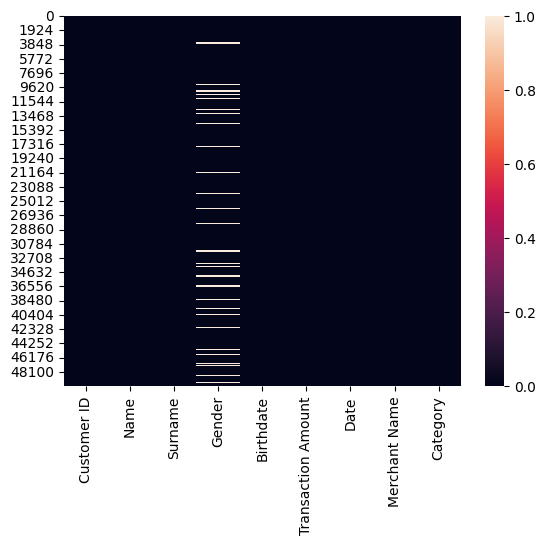

In [32]:
sns.heatmap(customer_transactions.isna())

In [14]:
customer_transactions['Name'].unique()

array(['Sean', 'Michelle', 'Jacob', 'Nathan', 'Crystal', 'Monica',
       'Thomas', 'Kelsey', 'Denise', 'Alexander', 'Kimberly', 'Hunter',
       'Julie', 'Christopher', 'Amber', 'Amy', 'Elizabeth', 'Chad',
       'Steven', 'Patrick', 'Daniel', 'Robert', 'Sara', 'Anthony',
       'Jessica', 'Brian', 'William', 'Adam', 'Betty', 'Pamela', 'Sarah',
       'Manuel', 'Aaron', 'Darlene', 'Hannah', 'Benjamin', 'Jason',
       'Scott', 'Emily', 'Katherine', 'Kevin', 'Jose', 'Meghan',
       'Michael', 'Dana', 'Lisa', 'Sydney', 'Melanie', 'Matthew', 'Tammy',
       'Justin', 'Ann', 'Joshua', 'Sabrina', 'Leslie', 'Jeffery', 'Mary',
       'Ashley', 'Joseph', 'Juan', 'Christina', 'Martha', 'John', 'Keith',
       'Alejandro', 'David', 'Jennifer', 'Nicholas', 'Christy', 'Jamie',
       'Douglas', 'Holly', 'Fernando', 'Yvonne', 'Margaret', 'Charles',
       'Derrick', 'Kurt', 'Timothy', 'Courtney', 'Joy', 'Carol',
       'Lawrence', 'Andrew', 'Nicole', 'Stephanie', 'Derek', 'Hector',
       'Jesse'

In [15]:
customer_transactions['Name'].nunique()

690

In [13]:
customer_transactions['Name'].value_counts()

Name
Michael        1167
David           761
John            749
James           730
Christopher     711
               ... 
Terrance          4
Preston           4
Perry             3
Latasha           2
Leon              1
Name: count, Length: 690, dtype: int64

In [16]:
customer_transactions['Surname'].unique()

array(['Rodriguez', 'Phelps', 'Williams', 'Snyder', 'Knapp', 'Bartlett',
       'Shaw', 'Pena', 'Porter', 'Richardson', 'Ball', 'Peters',
       'Russell', 'Harris', 'Brown', 'Pierce', 'Barnes', 'Reese',
       'Holden', 'Smith', 'Price', 'Pitts', 'Rice', 'Michael', 'Miller',
       'White', 'Ross', 'Jones', 'Contreras', 'Hansen', 'Atkinson',
       'Nguyen', 'Warner', 'Mercer', 'Robinson', 'Martinez', 'Tucker',
       'Maynard', 'Johnson', 'Harrison', 'Mcdaniel', 'Salas', 'Howard',
       'Gould', 'Acosta', 'Huang', 'Hunt', 'Spencer', 'Mcintyre',
       'Greene', 'Hoffman', 'Kim', 'Aguilar', 'Mathews', 'Hobbs',
       'Sullivan', 'Burgess', 'Campbell', 'Morgan', 'Pittman', 'Carr',
       'Meadows', 'Kelly', 'Ellis', 'Gonzales', 'Woods', 'Clark', 'Reed',
       'Taylor', 'Hines', 'Morrison', 'Quinn', 'Ramos', 'Collier',
       'Martin', 'Jackson', 'Klein', 'Oliver', 'Silva', 'Carter',
       'Glover', 'Mckee', 'Dennis', 'Padilla', 'Wilson', 'Armstrong',
       'Arnold', 'Peterson', 'Th

In [17]:
customer_transactions['Surname'].nunique()

1000

In [18]:
customer_transactions['Surname'].value_counts()

Surname
Smith       1095
Johnson      824
Williams     695
Brown        665
Jones        631
            ... 
Villa          9
Dickson        9
Hayden         9
Hays           9
Benitez        8
Name: count, Length: 1000, dtype: int64

In [19]:
customer_transactions['Gender'].unique()

array(['F', nan, 'M'], dtype=object)

In [20]:
customer_transactions['Gender'].nunique()

2

In [21]:
customer_transactions['Gender'].value_counts()

Gender
F    22713
M    22240
Name: count, dtype: int64

In [22]:
customer_transactions['Gender'] = customer_transactions['Gender'].replace('F', 'Female')
customer_transactions['Gender'] = customer_transactions['Gender'].replace('M', 'Male')

In [23]:
customer_transactions['Gender'].value_counts()

Gender
Female    22713
Male      22240
Name: count, dtype: int64

In [27]:
#Replace nan values in the Gender column with "Unknown"
customer_transactions['Category'].fillna('Prefer not to say', inplace=True)

In [28]:
customer_transactions['Gender'].value_counts()

Gender
Female    22713
Male      22240
Name: count, dtype: int64

In [29]:
customer_transactions.isnull().sum()

Customer ID              0
Name                     0
Surname                  0
Gender                5047
Birthdate                0
Transaction Amount       0
Date                     0
Merchant Name            0
Category                 0
dtype: int64

DATA CLEANING

In [ ]:
customer_transactions['Birthdate'] = pd.to_datetime(customer_transactions['Birthdate'])
customer_transactions['Date'] = pd.to_datetime(customer_transactions['Date'])
customer_transactions['Gender'] = customer_transactions['Gender'].astype('category')

In [ ]:
customer_transactions['Age'] = customer_transactions['Birthdate'].apply(lambda x: (datetime.now() - x).days // 365)

In [ ]:
customer_transactions

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(customer_transactions['Transaction Amount'], bins=30, kde=True)
plt.title('Transaction Amount Distribution')

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(customer_transactions['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=customer_transactions)
plt.title('Gender Distribution')


In [ ]:
plt.subplot(1, 2, 2)
sns.countplot(y='Category', data=customer_transactions)
plt.title('Transaction Categories')
plt.show()

In [ ]:
customer_transactions['YearMonth'] = customer_transactions['Date'].dt.to_period('M')

plt.figure(figsize=(12, 5))
sns.lineplot(data=customer_transactions.groupby('YearMonth')['Transaction Amount'].sum().reset_index(), x='YearMonth', y='Transaction Amount')
plt.title('Monthly Transaction Amount Over Time')
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='Gender', y='Transaction Amount', data=customer_transactions)
plt.title('Transaction Amount by Gender')
plt.show()

customer_transactions['AgeGroup'] = pd.cut(customer_transactions['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['<18', '18-35', '35-50', '50-65', '65+'])

plt.figure(figsize=(12, 5))
sns.boxplot(x='AgeGroup', y='Transaction Amount', data=customer_transactions)
plt.title('Transaction Amount by Age Group')
plt.show()

In [ ]:
top_merchants = customer_transactions.groupby('Merchant Name')['Transaction Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_merchants.values, y=top_merchants.index)
plt.title('Top 10 Merchants by Transaction Amount')
plt.show()

In [ ]:
category_spending = customer_transactions.groupby('Category')['Transaction Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
sns.barplot(x=category_spending.values, y=category_spending.index)
plt.title('Spending by Category')
plt.show()


In [ ]:
corr_matrix = customer_transactions[['Age', 'Transaction Amount']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

DATA PREPROCESSING

In [ ]:
customer_transactions['Gender'].unique()

In [ ]:
customer_transactions['Gender'] = customer_transactions['Gender'].replace ('F', 'Female')
customer_transactions['Gender'] = customer_transactions['Gender'].replace ('M', 'Male')
customer_transactions['Gender'] = customer_transactions['Gender'].replace ('nan', 'Prefer not to say')

In [ ]:
customer_transactions['Gender'].unique()

In [ ]:
customer_transactions['Transaction Amount'].unique()

In [ ]:
customer_transactions['Merchant Name'].unique()

UNIVARIATE ANALYSIS

In [ ]:
# Extract the values from the 'Gender' column and count occurrences
gender_counts = customer_transactions['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA']

# Create the pie chart
fig = px.pie(gender_counts, names='Gender', values='Count', title='Gender Distribution')

# Update the chart to add data labels
fig.update_traces(textinfo='percent+label')

# Show the plot
fig.show()

UNIVARIATE ANALYSIS

In [ ]:
# 1. Customer ID (int64)
print("Customer ID:")
print("Count of Unique Values:", customer_transactions['Customer ID'].nunique())
print("Summary Statistics:")
print(customer_transactions['Customer ID'].describe())

# 2. Name (object)
print("\nName:")
print("Count of Unique Names:", customer_transactions['Name'].nunique())
print("Most Common Names:")
print(customer_transactions['Name'].value_counts().head())
customer_transactions['Name_Length'] = customer_transactions['Name'].apply(len)
print("Mean Length:", customer_transactions['Name_Length'].mean())
print("Median Length:", customer_transactions['Name_Length'].median())
print("Missing Values:", customer_transactions['Name'].isnull().sum())

# 3. Surname (object)
print("\nSurname:")
print("Count of Unique Surnames:", customer_transactions['Surname'].nunique())
print("Most Common Surnames:")
print(customer_transactions['Surname'].value_counts().head())
customer_transactions['Surname_Length'] = customer_transactions['Surname'].apply(len)
print("Mean Length:", customer_transactions['Surname_Length'].mean())
print("Median Length:", customer_transactions['Surname_Length'].median())
print("Missing Values:", customer_transactions['Surname'].isnull().sum())

# 4. Gender (object)
print("\nGender:")
print("Count of Each Gender:")
print(customer_transactions['Gender'].value_counts())
print("Percentage Distribution:")
print(customer_transactions['Gender'].value_counts(normalize=True) * 100)
print("Missing Values:", customer_transactions['Gender'].isnull().sum())

# 5. Birthdate (object)
print("\nBirthdate:")
customer_transactions['Birth_Year'] = pd.to_datetime(customer_transactions['Birthdate']).dt.year
print("Distribution of Birth Years:")
print(customer_transactions['Birth_Year'].value_counts().sort_index())
print("Distribution of Birth Months:")
print(pd.to_datetime(customer_transactions['Birthdate']).dt.month.value_counts().sort_index())
customer_transactions['Age'] = pd.to_datetime('now').year - pd.to_datetime(customer_transactions['Birthdate']).dt.year
print("Mean Age:", customer_transactions['Age'].mean())
print("Median Age:", customer_transactions['Age'].median())
print("Youngest:", customer_transactions['Age'].min())
print("Oldest:", customer_transactions['Age'].max())
print("Missing Values:", customer_transactions['Birthdate'].isnull().sum())

# 6. Transaction Amount (float64)
print("\nTransaction Amount:")
print("Summary Statistics:")
print(customer_transactions['Transaction Amount'].describe())
plt.hist(customer_transactions['Transaction Amount'], bins=20)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()
# Outlier detection (can be adjusted as needed)
outliers = customer_transactions[(customer_transactions['Transaction Amount'] - customer_transactions['Transaction Amount'].mean()).abs() > 3 * customer_transactions['Transaction Amount'].std()]
print("Number of Outliers:", len(outliers))

# 7. Date (object)
print("\nDate:")
customer_transactions['Date'] = pd.to_datetime(customer_transactions['Date'])
print("Distribution of Transactions Over Time:")
print(customer_transactions['Date'].dt.to_period('M').value_counts().sort_index())
print("Missing Values:", customer_transactions['Date'].isnull().sum())

# 8. Merchant Name (object)
print("\nMerchant Name:")
print("Count of Unique Merchant Names:", customer_transactions['Merchant Name'].nunique())
print("Most Common Merchant Names:")
print(customer_transactions['Merchant Name'].value_counts().head())
print("Missing Values:", customer_transactions['Merchant Name'].isnull().sum())

# 9. Category (object)
print("\nCategory:")
print("Count of Unique Categories:", customer_transactions['Category'].nunique())
print("Most Common Categories:")
print(customer_transactions['Category'].value_counts().head())
print("Missing Values:", customer_transactions['Category'].isnull().sum())

In [ ]:
# 4. Gender
print("\nGender:")
print("- Count of Each Gender:")
print(customer_transactions['Gender'].value_counts())
print("- Percentage Distribution:")
print(customer_transactions['Gender'].value_counts(normalize=True) * 100)
print("- Missing Values:", customer_transactions['Gender'].isnull().sum())

In [ ]:
# Columns to exclude from the loop
#exclude_columns = ['latitude', 'longitude', 'Pin code']

# Loop through each column
for column in customer_transactions.columns:
    # Skip excluded columns
   # if column in exclude_columns:
   #     continue
    
    # Get unique values and their counts
    value_counts = customer_transactions[column].value_counts()
    
    # Create bar chart
    fig = px.bar(value_counts, x=value_counts.index, y=value_counts.values, 
                 labels={'x': column, 'y': 'Count'}, 
                 title=f"Value Counts for {column}")
    
    # Show plot
    fig.show()

#### TASK 1 - CHECK FOR DUPLICATED ROWS

In [ ]:
Total_dup = customer_transactions.duplicated().sum()
print('The total number of duplicate rows in this dataset is', Total_dup)

#### TASK 2 - CHECK FOR MISSING VALUES

In [ ]:
customer_transactions.isna().sum()

In [ ]:
Total_MV = customer_transactions.isna().sum().sum()
print('The total number of missing values in this dataset is', Total_MV)

In [ ]:
#Check for the percentage for the missing values.

missing_gender = customer_transactions['Gender'].isnull().sum()
total_rows = len(customer_transactions)
missing_percentage = (missing_gender / total_rows) * 100

print(f"Missing Gender Values: {missing_gender} ({missing_percentage:.2f}%)")

#### HEATMAP FOR MISSING VALUES

In [ ]:
sns.heatmap(customer_transactions.isnull())

#### INSIGHTS

The results showed that there are 5,047 missing values in the gender column which sums up to 10.09% of the dataset. 

In dealing with this, I will replace all the missing values in the gender column to UNDEFINED.

This presupposes that the these customers did not find their gender orientation listed in there to select, hence the empty field.

#### DEALING WITH THE MISSING VALUES.

In [ ]:
#Replace missing values in the gender column with undefined.

customer_transactions['Gender'].fillna('Undefined', inplace=True)

In [ ]:
#Replace gender initials with the full word.

customer_transactions['Gender'] = customer_transactions['Gender'].replace('M', 'Male')
customer_transactions['Gender'] = customer_transactions['Gender'].replace('F', 'Female')

In [ ]:
#Checking for the unique values in the Gender column after replacing the missing values and renaming the initials with full word.
customer_transactions['Gender'].unique()

#### RENAME SOME COLUMNS NAME

In [ ]:
customer_transactions = customer_transactions.rename(columns={'Name': 'First Name', 'Surname': 'Last Name', 
                                                              'Birthdate': 'Date of Birth', 
                                                              'Transaction Amount': 'Transaction Amt ($)'})

In [ ]:
customer_transactions.columns

#### CHECK THE 

In [ ]:
customer_transactions.describe().T

In [ ]:
customer_transactions.describe(include='object').T

## EXPLORATORY DATA ANALYSIS, (E.D.A)

#### MAKE A COPY OF THE ORIGINAL DATASET.

In [ ]:
customer_transactions_copy = customer_transactions.copy

In [ ]:
Cols_drop = ['Customer ID', 'Last Name']
customer_transactions = customer_transactions.drop(columns= Cols_drop)

In [ ]:
customer_transactions.boxplot()

#### INSIGHTS TO BE DERIVED FROM THIS ANALYSIS

#### QUESTIONS

 - Which category made the highest sales during the period?
 - Which age grouping patronized more of cosmetics, clothings and travel?
 - Which date had the highest patronage for Clothing?

#### Question 1
 - Which category made the highest sales during the period?

In [ ]:
# Group the data by category and calculate total sales for each category
category_sales = customer_transactions.groupby('Category')['Transaction Amt ($)'].sum()

# Print the total sales for each category
print(category_sales)

In [ ]:
customer_transactions = category_sales.reset_index()
customer_transactions.columns = ['Category', 'Transaction Amt ($)']

# Plotting the bar chart using Plotly Express
fig = px.bar(customer_transactions, x='Category', y='Transaction Amt ($)',
             title='Total Sales by Category',
             labels={'Transaction Amt ($)': 'Transaction Amt ($)'},
             text='Transaction Amt ($)',
             width=800, height=500)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

In [ ]:
# Find the category with the highest total sales
highest_sales_category = category_sales.idxmax()
highest_sales_amount = category_sales.max()

print(f"The category with the highest sales is '{highest_sales_category}' with a total sales amount of $ {highest_sales_amount:.2f}")

#### Question 2
 - Which age group patronized more of cosmetics, clothings and travel?

In [ ]:
# Convert the 'Date of Birth' column to datetime
customer_transactions['Date of Birth'] = pd.to_datetime(customer_transactions['Date of Birth'])

# Calculate age based on the current date
current_date = datetime.now()
customer_transactions['Age'] = (current_date - customer_transactions['Date of Birth']) // pd.Timedelta(days=365)

customer_transactions

In [ ]:
# Group Ages into categories: young, middle age, and old

# Define age bins and labels
age_bins = [0, 30, 50, 100]  # You can adjust these age boundaries as needed

age_labels = ['Young', 'Middle Age', 'Old']

# Apply age grouping
customer_transactions['Age Group'] = pd.cut(customer_transactions['Age'], bins=age_bins, labels=age_labels, right=False)


In [ ]:
customer_transactions.head()

In [ ]:
# Create a pie chart to visualize the results
labels = ['Cosmetic', 'Clothing', 'Travel']
sizes = [grouped_data['Travel'].max(), grouped_data['Clothing'].max(), grouped_data['Cosmetic'].max()]
explode = (0.1, 0, 0)  # Explode the 1st slice (Cosmetic)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Age Groups Patronizing Products')

plt.show()

#### Question 3
 - Which date had the highest patronage for Clothing?

In [ ]:
# List of categories you want to analyze
categories_to_analyze = ['Cosmetic', 'Clothing', 'Travel' , 'Electronics' , 'Market', 'Restaurant']

# Iterate through the categories
for category in categories_to_analyze:
    # Filter the data for the specific category
    category_data = customer_transactions[customer_transactions['Category'] == category]
    
    # Group the data by date and count the number of purchases for each date
    date_patronage = category_data.groupby('Date').size()
    
    # Find the date with the highest patronage for the category
    date_with_highest_patronage = date_patronage.idxmax()
    highest_patronage_count = date_patronage.max()
    
    print(f"For the '{category}' category:")
    print(f"The date with the highest patronage is {date_with_highest_patronage} with {highest_patronage_count} purchases.")
    print()


 #### Question 4
 - What is the total number of person based on their gender patronized restaurant?

In [ ]:
# Filter the data for the "Restaurant" category
restaurant_data = customer_transactions[customer_transactions['Category'] == 'Restaurant']

# Group the data by gender and count the number of patrons for each gender
gender_patrons = restaurant_data['Gender'].value_counts()

print("Total number of people who patronized the restaurant based on gender:")
print(gender_patrons)


In [ ]:
customer_transactions = pd.DataFrame({'Gender': gender_patrons.index, 'Number of Patrons': gender_patrons.values})

# Creating a bar chart using Plotly Express
fig = px.bar(customer_transactions, x='Gender', y='Number of Patrons',
             color='Gender',
             title='Total Number of Restaurant Patrons by Gender',
             labels={'Number of Patrons': 'Number of Patrons', 'Gender': 'Gender'},
             width=1000, height=00)

# Show the plot
fig.show()

 #### Question 5
 - What is the trend in the transactions?

In [ ]:
# Convert the 'transaction_date' column to a datetime object
customer_transactions['Date'] = pd.to_datetime(customer_transactions['Date'])

# Group the data by transaction date and count the number of transactions for each date
transaction_trend = customer_transactions.groupby('Date').size()

# Create a line chart to visualize the transaction trend
plt.figure(figsize=(12, 6))
plt.plot(transaction_trend.index, transaction_trend.values, marker='o', color='red')
plt.title('Transaction Trend Over The Transaction Period.')
plt.xlabel('Transaction Date')
plt.ylabel('Number of Transactions')
plt.grid(True)

# Optionally, format the x-axis labels for date
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=10))  # Adjust the interval as needed

plt.xticks(rotation=45)

plt.show()

 #### Question 6
 - What is the percentage for the various gender? 

In [ ]:
#value counts for each gender

customer_transactions['Gender'].value_counts()

In [ ]:
# Assuming your DataFrame has a 'Gender' column, you can count the number of transactions for each gender
gender_counts = customer_transactions['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution Percentage')

# Add a legend
plt.legend()

plt.show()

In [ ]:
# Group by "Age Group" and count the number of each gender within each age group
age_gender_distribution = customer_transactions.groupby(['Age Group', 'Gender']).size().unstack(fill_value=0)

# Display the age-gender distribution
print(age_gender_distribution)

In [ ]:
# Plot the age-gender distribution as a bar chart
age_gender_distribution.plot(kind='bar')
plt.title('Age-Gender Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.show()

 #### Question 7
 - Which merchant name had the highest number of transactions during the period?

In [ ]:
# Group the data by the merchant and count the number of transactions for each merchant

merchant_transaction_counts = customer_transactions['Merchant Name'].value_counts()

merchant_with_highest_transactions = merchant_transaction_counts.idxmax()

highest_transaction_count = merchant_transaction_counts.max()

print(f"The merchant with the highest number of transactions is '{merchant_with_highest_transactions}'")
print()
print(f"They have {highest_transaction_count} transactions.")